In [1]:
# Let's demonstrate kernel regression using Python
# We'll compare it with linear regression to show how it works

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + 0.3 * np.random.randn(100)  # sine wave with noise

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

## Kernel Regression: Key Formulas

**Gaussian Kernel:**

\[
$K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right)$
\]

**Nadaraya–Watson Estimator:**

\[
$\hat{m}(x_0) = \frac{\sum_{i=1}^n K\left(\frac{x_0 - x_i}{h}\right) y_i}{\sum_{i=1}^n K\left(\frac{x_0 - x_i}{h}\right)}$
\]

where  
- \( $x_0$ \) is the evaluation point,  
- \( $x_i, y_i$ \) are the data points,  
- \( $h$ \) is the bandwidth.

**Silverman’s Rule of Thumb for Optimal Bandwidth:**

\[
$h = 1.06 \cdot \hat{\sigma}_X \cdot n^{-1/5}$
\]

where  
- \( $\hat{\sigma}_X$ \) is the standard deviation of \( $X$ \),  
- \( $n$ \) is the number

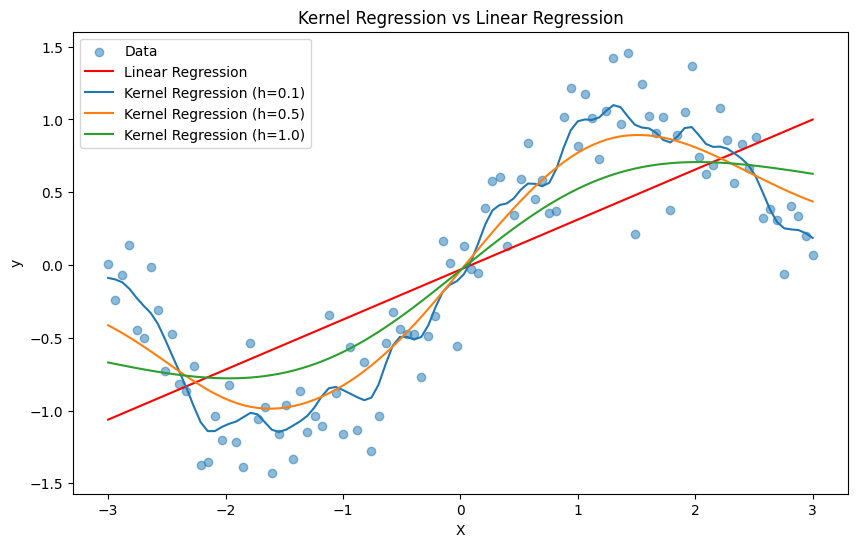

In [ ]:
# Fit a simple linear regression model for comparison
lin_reg = LinearRegression()
lin_reg.fit(X_reshaped, y)
y_lin_pred = lin_reg.predict(X_reshaped)

# Kernel regression (Nadaraya–Watson) implementation
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u ** 2)

def nadaraya_watson(X_train, y_train, X_eval, bandwidth):
    y_pred = []
    for x0 in X_eval:
        weights = gaussian_kernel((x0 - X_train) / bandwidth)
        y_hat = np.sum(weights * y_train) / np.sum(weights)
        y_pred.append(y_hat)
    return np.array(y_pred)

# Try different bandwidths
bandwidths = [0.1, 0.5, 1.0]

h = 1.06 * np.std(X) * len(X) ** (-1/5)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, y_lin_pred, color="red", label="Linear Regression")

for h in bandwidths:
    y_kernel_pred = nadaraya_watson(X, y, X, h)
    plt.plot(X, y_kernel_pred, label=f"Kernel Regression (h={h})")

plt.title("Kernel Regression vs Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
